<a href="https://colab.research.google.com/github/yenlung/Python-101-MOOC/blob/main/MOOC6-2SVM%E5%88%86%E9%A1%9E%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
X = iris.data
Y = iris.target

In [ ]:
X.shape

(150, 4)

In [ ]:
Y.shape

(150,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = X[:, 2:]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=42)

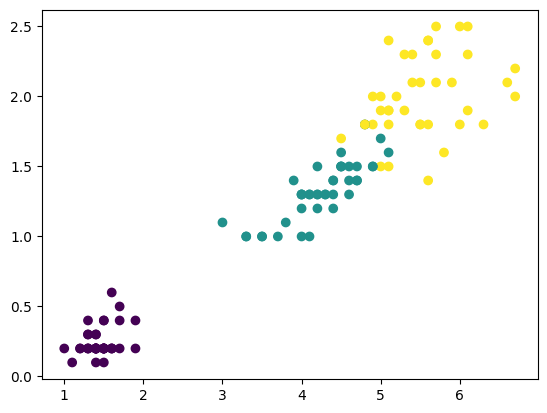

In [ ]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train);

In [ ]:
# 打開一台 SVM 函數學習機

from sklearn.svm import SVC

In [ ]:
clf = SVC()

In [ ]:
clf.fit(x_train, y_train)

SVC()

In [ ]:
y_predict = clf.predict(x_test)

In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

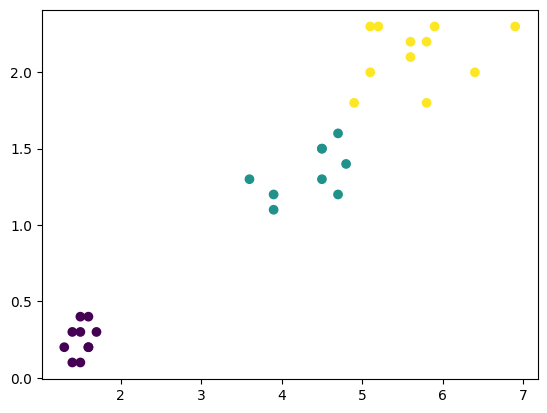

In [ ]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test);

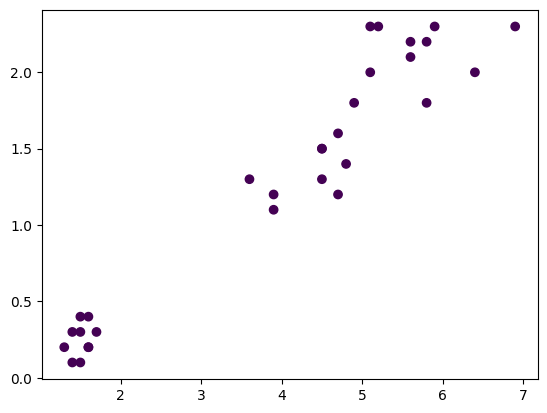

In [ ]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_predict-y_test);

Text(0, 0.5, 'Petal Width (cm)')

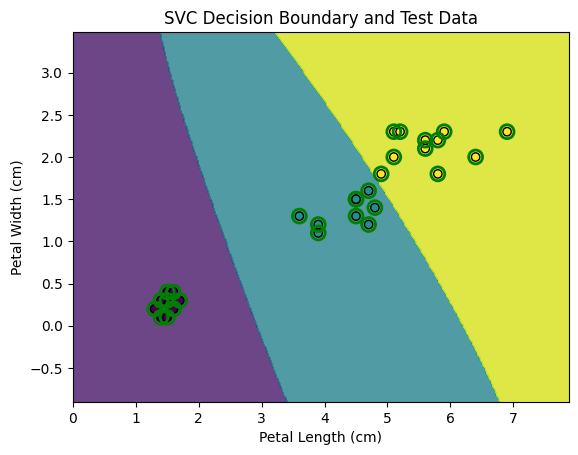

In [ ]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the test data points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors='k', marker='o')

# Highlight correctly classified points
correctly_classified = (y_predict == y_test)
plt.scatter(x_test[correctly_classified, 0],
            x_test[correctly_classified, 1],
            facecolors='none', edgecolors='green', marker='o', s=100, linewidth=2)

plt.title("SVC Decision Boundary and Test Data")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")